### kaggle wine

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
wine =pd.read_csv('../03.분류/data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [97]:
# wine['target'] = wine.quality.apply(lambda x: 1 if x >= 6 else 0)
# wine.head()

In [98]:
X =wine.iloc[:,:-1].values
y =wine.iloc[:,-1].values

In [99]:
wine_std =StandardScaler().fit_transform(X)

pca =PCA(2)
wine_pca =pca.fit_transform(wine_std)

In [100]:
from sklearn.cluster import KMeans
kmeans =KMeans(2,verbose=1,random_state=2023, n_init=10)
kmeans.fit(wine_std)

Initialization complete
Iteration 0, inertia 20279.167382638523.
Iteration 1, inertia 14549.79163909218.
Iteration 2, inertia 14438.60361165582.
Iteration 3, inertia 14384.922879089427.
Iteration 4, inertia 14356.36800646069.
Iteration 5, inertia 14346.888145869063.
Iteration 6, inertia 14340.74903913952.
Iteration 7, inertia 14337.680168655541.
Iteration 8, inertia 14336.48807967925.
Iteration 9, inertia 14335.253396510652.
Iteration 10, inertia 14333.277467281174.
Iteration 11, inertia 14331.965495951768.
Iteration 12, inertia 14331.65693085458.
Converged at iteration 12: center shift 2.0487610675071934e-05 within tolerance 0.00010000000000000007.
Initialization complete
Iteration 0, inertia 26136.388656203686.
Iteration 1, inertia 15779.397237300454.
Iteration 2, inertia 15397.013163138996.
Iteration 3, inertia 14879.690779478824.
Iteration 4, inertia 14577.297382557113.
Iteration 5, inertia 14481.919816095146.
Iteration 6, inertia 14430.65991287438.
Iteration 7, inertia 14389.92193

KMeans(n_clusters=2, n_init=10, random_state=2023, verbose=1)

In [101]:
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [102]:
import numpy as np
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([1011,  588], dtype=int64))

In [103]:
df =pd.DataFrame(wine_pca,columns=['PC1','PC2'])
df['target'] =y
df['cluster']=kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-0.657853,0.460508,5,0
50,0.588407,-0.550912,5,1
51,-1.561117,-0.539038,6,0
52,-1.521344,-0.722780,6,0
53,0.846394,2.123361,5,0


In [104]:
df.target.value_counts().sort_index()

target
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [105]:
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
3      0          7
       1          3
4      0         43
       1         10
5      0        497
       1        184
6      0        388
       1        250
7      0         69
       1        130
8      0          7
       1         11

In [106]:
wine.describe() 
dir(wine)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

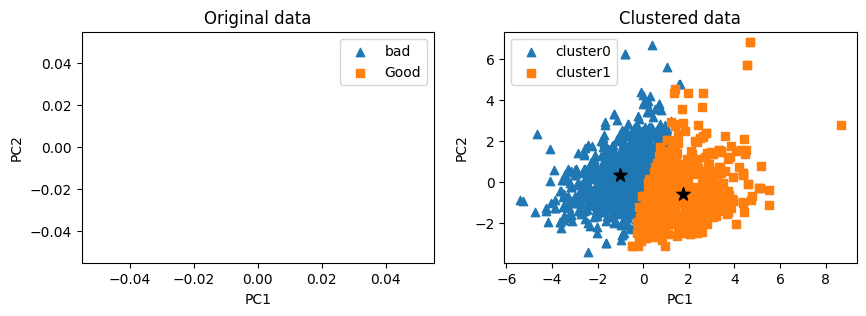

In [107]:
markers = ['^', 's']
my_label=['bad','Good']   
plt.figure(figsize=(10,3))
for k,column in enumerate (['target','cluster']):
    plt.subplot(1,2,k+1)
    for i , marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=my_label[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='black',s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")
    else:
        plt.title("Clustered data")

plt.show()

In [111]:
from sklearn.metrics import silhouette_samples,silhouette_score

sil_samples =silhouette_samples(wine_std,kmeans.labels_)
df['실루엣 계수'] =sil_samples
df.head()

,PC1,PC2,target,cluster,실루엣 계수
0,-1.619530,0.450950,5,0,0.387865
1,-0.799170,1.856553,5,0,0.313663
2,-0.748479,0.882039,5,0,0.354957
3,2.357673,-0.269976,6,1,0.229537
4,-1.619530,0.450950,5,0,0.387865


In [120]:
# 실루엣 계수의 평균이 실루엣 스코어
df['실루엣 계수'].mean()

0.21394174587816794

In [112]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.268490
1,0.120152


In [119]:
kmeans2=KMeans(n_clusters=2,random_state=2023,n_init='auto')
kmeans2.fit(wine_std)
silhouette_score(wine_std,kmeans2.labels_)

0.2068046222150101

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\

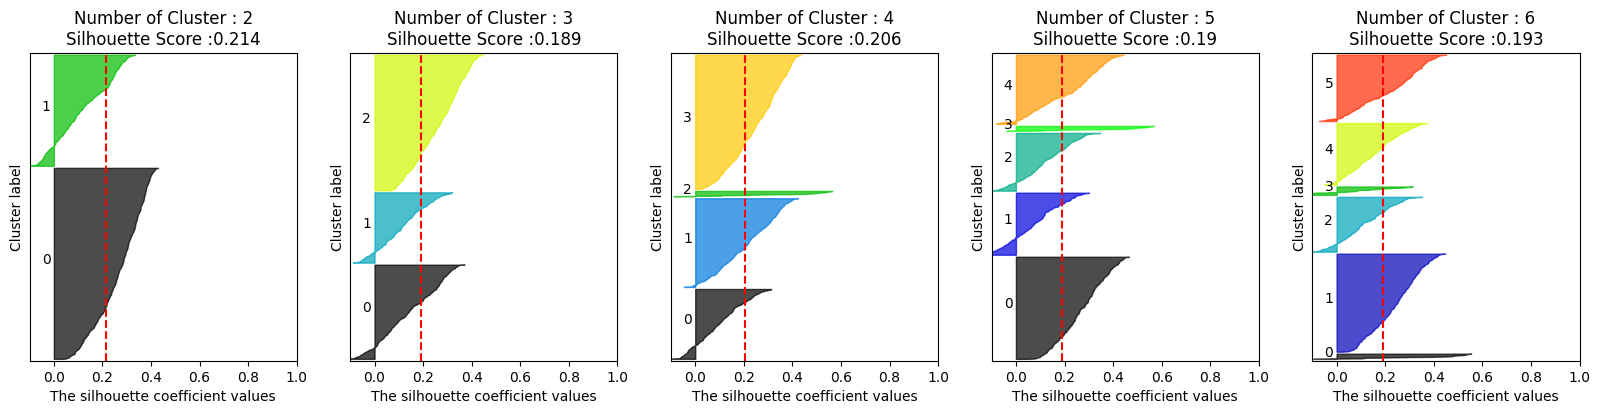

In [116]:
from visualize import visualize_silhouette 
visualize_silhouette([2,3,4,5,6], wine_std)